In [27]:
import os
os.chdir('/media/soham/New Volume/GitHub/BTP')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from utils.preprocessing import log_transform

warnings.filterwarnings("ignore")

In [28]:
''' We have 10 points of Analyte1 data, Analyte2 data and Analyte3 data respectively. '''

os.chdir('/media/soham/New Volume/GitHub/BTP')

analyte1 = pd.read_csv('data/Analyte1.csv').sort_values('CFU/mL', ascending=True).drop('Unnamed: 0', axis=1)
analyte2 = pd.read_csv('data/Analyte2.csv').sort_values('CFU/mL', ascending=True).drop('Unnamed: 0', axis=1)
analyte3 = pd.read_csv('data/Analyte3.csv').sort_values('CFU/mL', ascending=True).drop('Unnamed: 0', axis=1)

[analyte1, analyte2, analyte3]  = log_transform([analyte1, analyte2, analyte3])
analyte1

,CFU/mL,Sensor2,Sensor1,Sensor3,log,log_sensor1,log_sensor2,log_sensor3
9,0.000000e+00,-65.500000,-183.780000,-68.340000,-inf,5.213739,4.182050,4.224495
8,0.000000e+00,-50.570000,-150.230000,-64.370000,-inf,5.012167,3.923359,4.164648
7,1.000000e+01,-35.580000,-128.550000,-54.390000,2.302585,4.856318,3.571784,3.996180
6,8.000000e+01,-25.250000,-115.180000,-36.270000,4.382027,4.746496,3.228826,3.590991
5,7.000000e+02,-20.620000,-112.206000,-31.240000,6.551080,4.720336,3.026261,3.441699
4,3.050000e+03,-19.620000,-109.940000,-27.240000,8.022897,4.699935,2.976549,3.304686
3,3.050000e+04,-18.700000,-107.420000,-23.930000,10.325482,4.676746,2.928524,3.175133
22,1.657045e+05,0.000000,-100.032858,0.000000,12.670225,4.605499,-inf,-inf
19,2.367773e+05,0.000000,-99.895040,0.000000,12.618278,4.604120,-inf,-inf
2,3.050000e+05,-8.390000,-99.960000,-10.410000,12.628067,4.604770,2.127041,2.342767


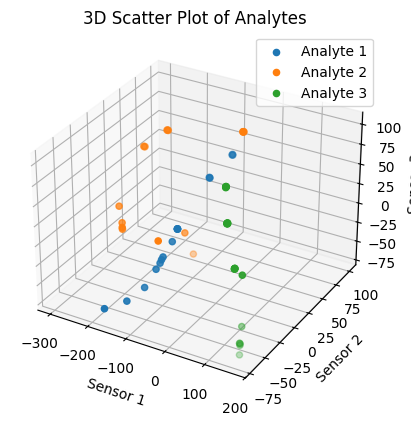

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['Sensor1'], analyte1['Sensor2'], analyte1['Sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['Sensor1'], analyte2['Sensor2'], analyte2['Sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['Sensor1'], analyte3['Sensor2'], analyte3['Sensor3'], label='Analyte 3')

ax.set_xlabel('Sensor 1')
ax.set_ylabel('Sensor 2')
ax.set_zlabel('Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()
plt.show()

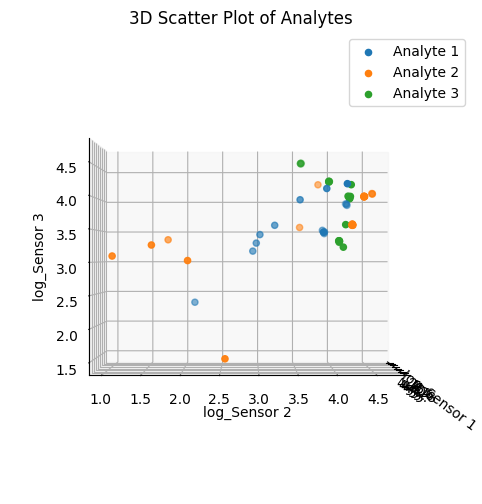

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=0, azim=0)  
plt.show()

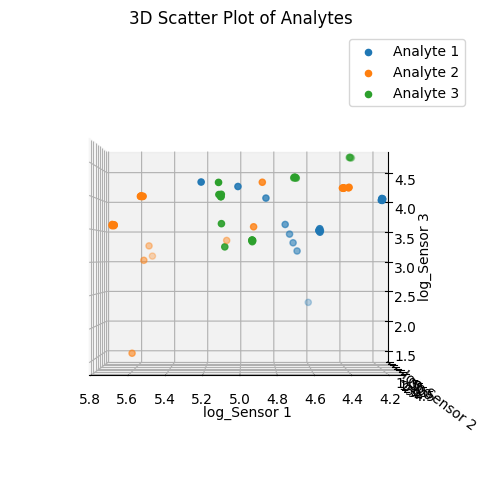

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=0, azim=90)  
plt.show()

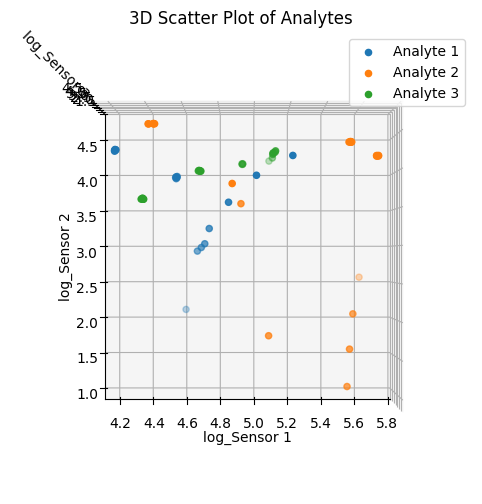

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=90, azim=270)  
plt.show()

## Analyte 1

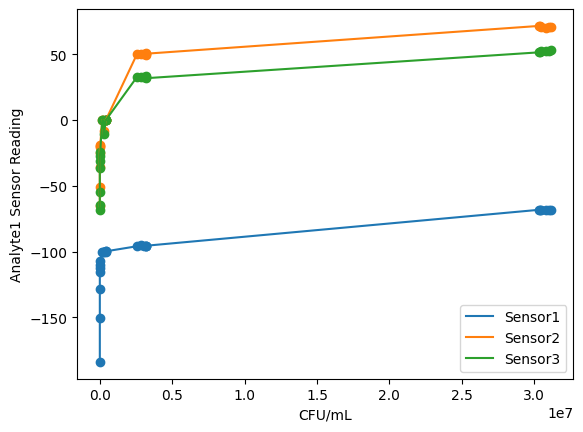

In [33]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor1'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor1'], label='Sensor1')

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor2'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor2'], label='Sensor2')

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor3'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte1 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte1.png')
plt.show()

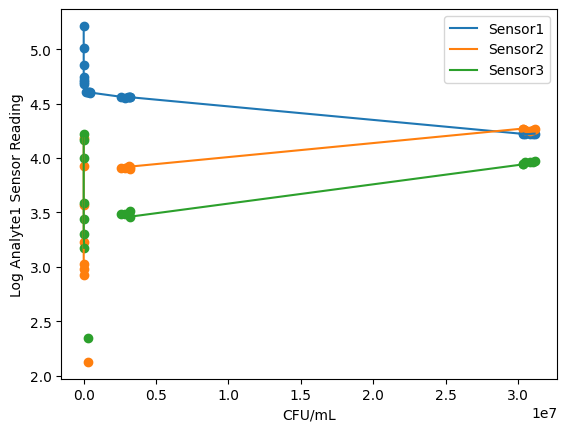

In [34]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor1'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor1'], label='Sensor1')

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor2'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor2'], label='Sensor2')

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor3'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte1 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte1.png')
plt.show()

## Analyte 2

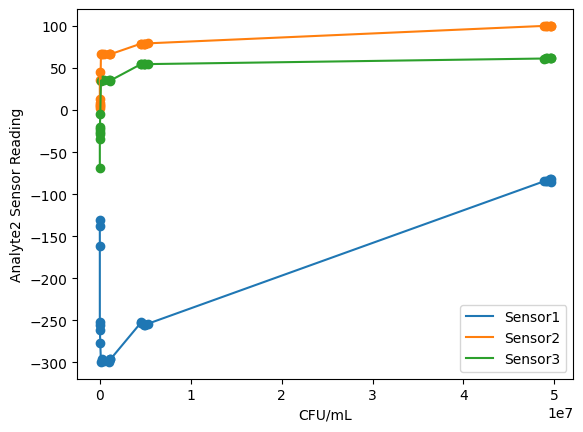

In [35]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor1'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor1'], label='Sensor1')

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor2'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor2'], label='Sensor2')

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor3'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte2 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte2.png')
plt.show()

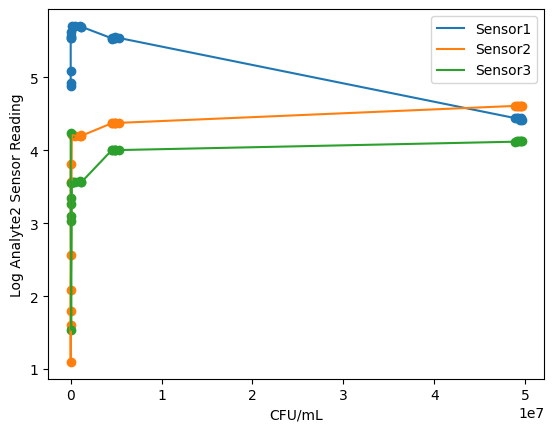

In [36]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor1'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor1'], label='Sensor1')

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor2'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor2'], label='Sensor2')

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor3'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte2 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte2.png')
plt.show()

## Analyte 3

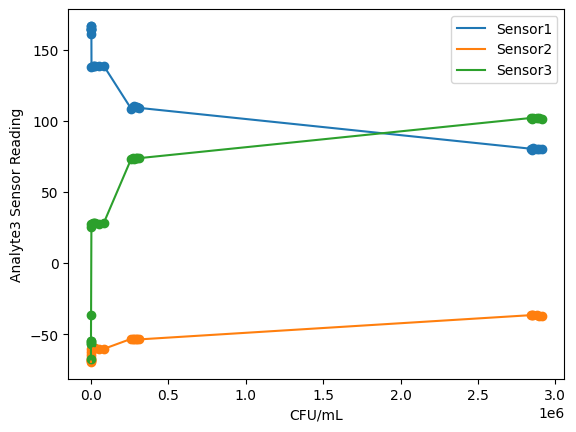

In [41]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor1'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor1'], label='Sensor1')

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor2'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor2'], label='Sensor2')

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor3'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte3 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte3.png')
plt.show()

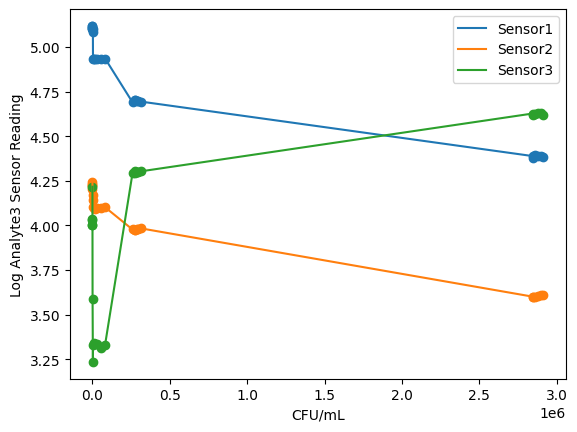

In [42]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor1'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor1'], label='Sensor1')

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor2'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor2'], label='Sensor2')

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor3'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte3 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte3.png')
plt.show()

## Clustering of PCA  

In [39]:
pca = PCA(n_components=2)
pca_analyte1 = pca.fit_transform(analyte1[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=2)
pca_analyte2 = pca.fit_transform(analyte2[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=2)
pca_analyte3 = pca.fit_transform(analyte3[['Sensor1', 'Sensor2', 'Sensor3']])

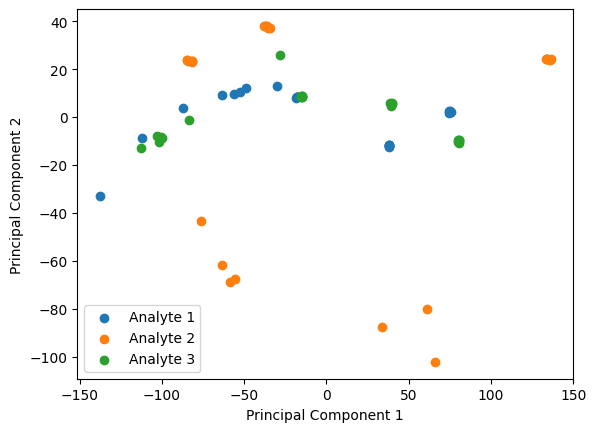

In [43]:
plt.scatter(pca_analyte1[:,0], pca_analyte1[:,1], label='Analyte 1')
plt.scatter(pca_analyte2[:,0], pca_analyte2[:,1], label='Analyte 2')
plt.scatter(pca_analyte3[:,0], pca_analyte3[:,1], label='Analyte 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('docs/plots/pca.png')

plt.show()

In [45]:
pca = PCA(n_components=2)
pca_analyte1 = pca.fit_transform(analyte1[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=2)
pca_analyte2 = pca.fit_transform(analyte2[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=2)
pca_analyte3 = pca.fit_transform(analyte3[['Sensor1', 'Sensor2', 'Sensor3']])

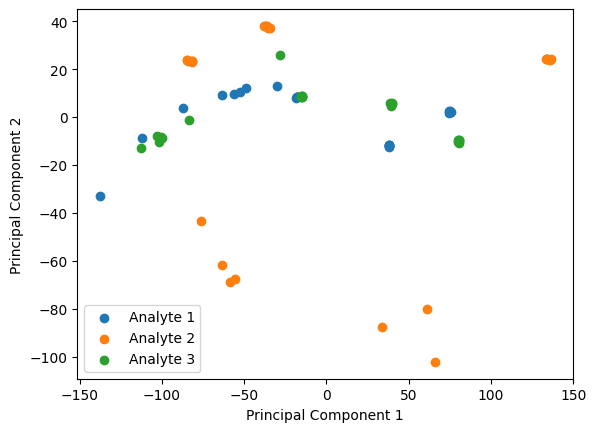

In [46]:
plt.scatter(pca_analyte1[:,0], pca_analyte1[:,1], label='Analyte 1')
plt.scatter(pca_analyte2[:,0], pca_analyte2[:,1], label='Analyte 2')
plt.scatter(pca_analyte3[:,0], pca_analyte3[:,1], label='Analyte 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('docs/plots/pca.png')

plt.show()

## Clustering of ICA

In [47]:
ica = ICA(n_components=2)
ica_analyte1 = ica.fit_transform(analyte1[['Sensor1', 'Sensor2', 'Sensor3']], analyte1['CFU/mL'].ravel())

ica = ICA(n_components=2)
ica_analyte2 = ica.fit_transform(analyte2[['Sensor1', 'Sensor2', 'Sensor3']], analyte2['CFU/mL'].ravel())

ica = ICA(n_components=2)
ica_analyte3 = ica.fit_transform(analyte3[['Sensor1', 'Sensor2', 'Sensor3']], analyte3['CFU/mL'].ravel())

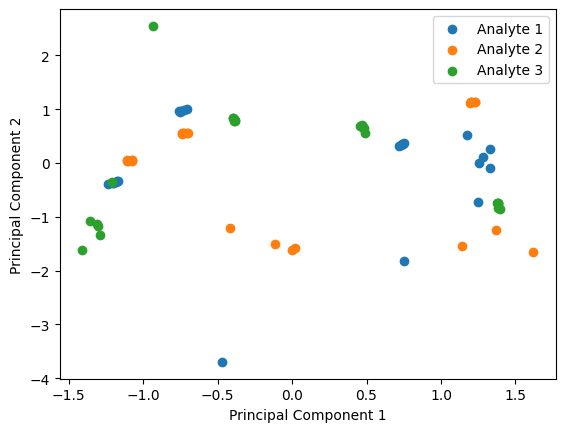

In [49]:
plt.scatter(ica_analyte1[:,0], ica_analyte1[:,1], label='Analyte 1')
plt.scatter(ica_analyte2[:,0], ica_analyte2[:,1], label='Analyte 2')
plt.scatter(ica_analyte3[:,0], ica_analyte3[:,1], label='Analyte 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('docs/plots/ica.png')

plt.show()

In [50]:
ica = ICA(n_components=2)
ica_analyte1 = ica.fit_transform(analyte1[['Sensor1', 'Sensor2', 'Sensor3']], np.log(analyte1['CFU/mL']).ravel())

ica = ICA(n_components=2)
ica_analyte2 = ica.fit_transform(analyte2[['Sensor1', 'Sensor2', 'Sensor3']], np.log(analyte2['CFU/mL']).ravel())

ica = ICA(n_components=2)
ica_analyte3 = ica.fit_transform(analyte3[['Sensor1', 'Sensor2', 'Sensor3']], np.log(analyte3['CFU/mL']).ravel())

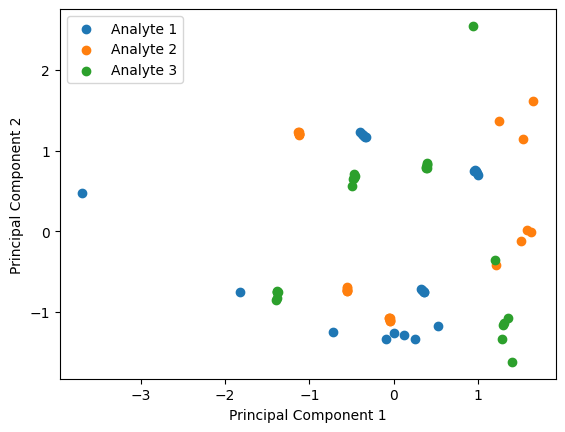

In [52]:
plt.scatter(ica_analyte1[:,0], ica_analyte1[:,1], label='Analyte 1')
plt.scatter(ica_analyte2[:,0], ica_analyte2[:,1], label='Analyte 2')
plt.scatter(ica_analyte3[:,0], ica_analyte3[:,1], label='Analyte 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('docs/plots/ica_log.png')

plt.show()